Ссылка на GitHub, на котором расположены все файлы с данными и файлы python: https://github.com/pavleke/hotels/tree/main

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import sklearn
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from scipy.stats import f
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/hotels_without_bin.csv', sep='\t').drop('Unnamed: 0', axis=1)
df_perks = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/perks_bin', sep='\t').drop('Unnamed: 0', axis=1)
df_amen = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/amen_bin', sep='\t').drop('Unnamed: 0', axis=1)
df_with_perks = df.join(df_perks)
df_all = df_with_perks.join(df_amen)
df_w = df.dropna()
df_all_w = df_all.dropna()

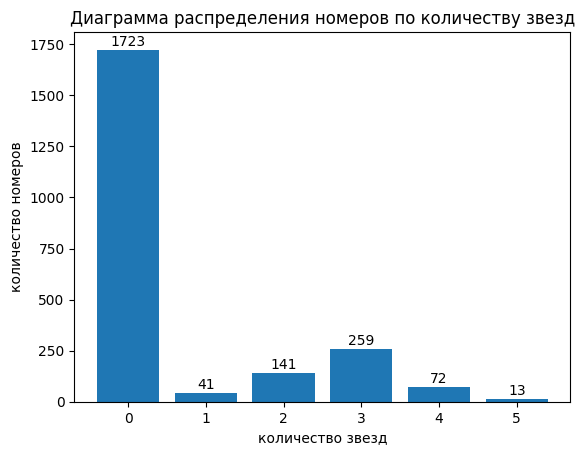

In [ ]:
n_s = df_w['stars'].value_counts().sort_index()
plt.bar(np.arange(0, 6), n_s)
for i in range(6):
    plt.text(i, n_s[i] + 20, n_s[i], ha = 'center')
plt.title("Диаграмма распределения номеров по количеству звезд")
plt.xlabel("количество звезд")
plt.ylabel("количество номеров")
plt.show()

Таким образом, большинство отелей относятся к категории 0 звезд

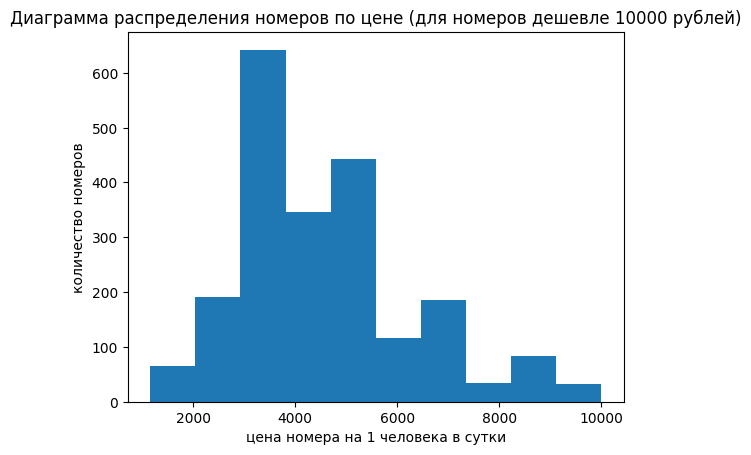

In [ ]:
plt.hist(df_w[df_w['price'] <= 10000]['price']);
plt.title("Диаграмма распределения номеров по цене (для номеров дешевле 10000 рублей)")
plt.xlabel("цена номера на 1 человека в сутки")
plt.ylabel("количество номеров")
plt.show()

Таким образом, наибольшее количество номеров в этой ценовой категории попадает в промежуток от 3000 до 4000 тысяч рублей.

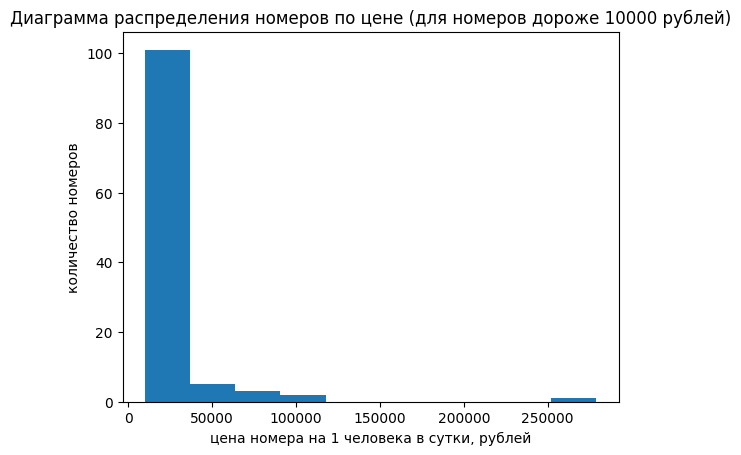

In [ ]:
plt.hist(df_w[df_w['price'] >= 10000]['price'])
plt.title("Диаграмма распределения номеров по цене (для номеров дороже 10000 рублей)")
plt.xlabel("цена номера на 1 человека в сутки, рублей")
plt.ylabel("количество номеров")
plt.show()

Как видно по графику, номеров дороже 10000 рублей в сутки достаточно мало - только немногим больше 100

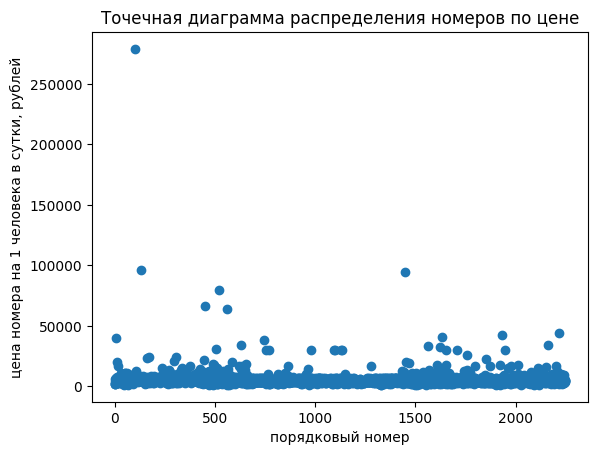

In [ ]:
plt.scatter(np.arange(0, 2249), df_w['price']);
plt.title("Точечная диаграмма распределения номеров по цене")
plt.xlabel("порядковый номер")
plt.ylabel("цена номера на 1 человека в сутки, рублей")
plt.show()

Данный график позволяет получить такие же выводы, как и два предыдущих графика - что, скорее всего, номера дороже, чем 10000 тысяч рублей в сутки будут являться выбросами

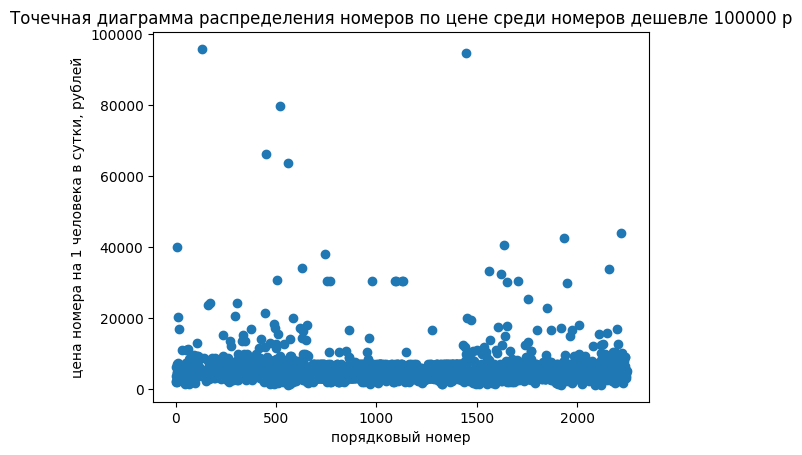

In [ ]:
plt.scatter(np.arange(0, 2248), df_w[df_w['price'] <= 100000]['price']);
plt.title("Точечная диаграмма распределения номеров по цене среди номеров дешевле 100000 р")
plt.xlabel("порядковый номер")
plt.ylabel("цена номера на 1 человека в сутки, рублей")
plt.show()

Данный график позволяет получить такие же выводы, как и три предыдущих графика - что, скорее всего, номера дороже, чем 10000 тысяч рублей в сутки будут являться выбросами

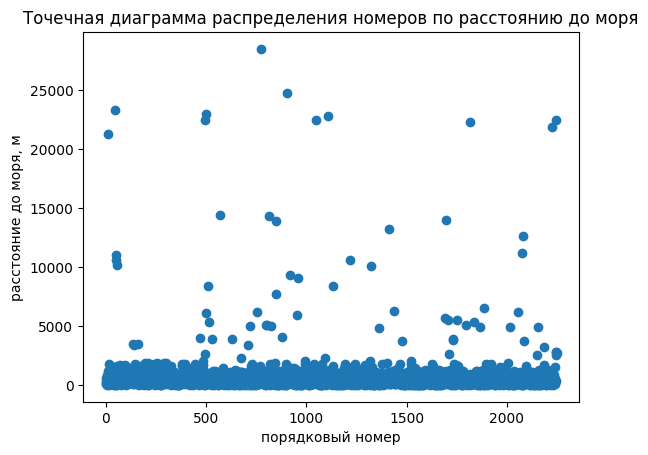

In [ ]:
plt.scatter(np.arange(0, 2249), df_w['dist_sea'])
plt.title("Точечная диаграмма распределения номеров по расстоянию до моря")
plt.xlabel("порядковый номер")
plt.ylabel("расстояние до моря, м")
plt.show()

Как мы видим по графику выше, большинство отелей расположены в промежутке до 2500 метров до моря

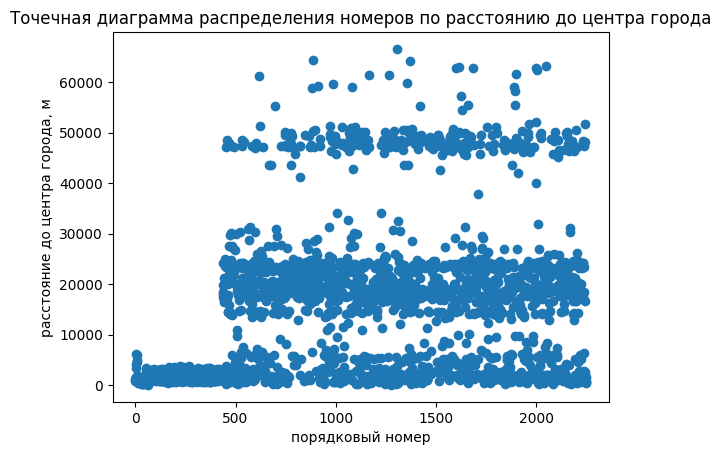

In [ ]:
plt.scatter(np.arange(0, 2249), df_w['dist_city'])
plt.title("Точечная диаграмма распределения номеров по расстоянию до центра города")
plt.xlabel("порядковый номер")
plt.ylabel("расстояние до центра города, м")
plt.show()

Как мы видим, скорее всего, данные неоднородны по расстоянию до центра города, потому что на графике достаточно явно выделяются три группы отелей. При последующем анализе данных мы подтвердили данные выводы и оставили в выборке только те 1800 отелей, которые расположены непосредственно в Сочи, а не в ближайших к Сочи населенных пунктах, для того, чтобы уменьшить неоднородность в данных

In [ ]:
df_wc_p= df['perks'].str.replace('[', '').str.replace(']', '')

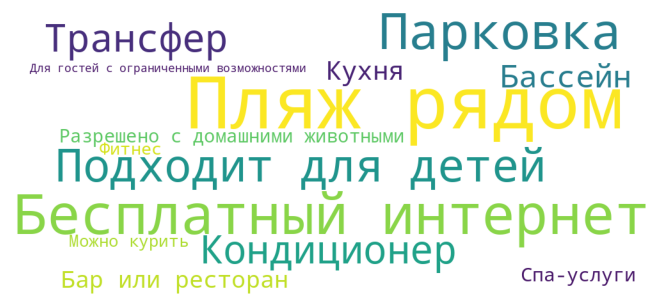

In [ ]:
text = ', '.join(i for i in df_wc_p)
t = np.array(text.replace("'", "").split(', '))
p, fr = np.unique(t, return_counts=True)
dict_fr = dict(zip(p, fr))
wordcloud = WordCloud(width = 1000, height = 450, prefer_horizontal=1,
                background_color ='white',
                collocations=False,
                min_font_size = 15).generate_from_frequencies(dict_fr)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Таким образом, наиболее часто отмечаемое в описании отеля удобство - это "пляж рядом", а также "парковка" и "бесплатный интернет"

In [ ]:
df_wc_a = df['amenities'].str.replace('[', '').str.replace(']', '')

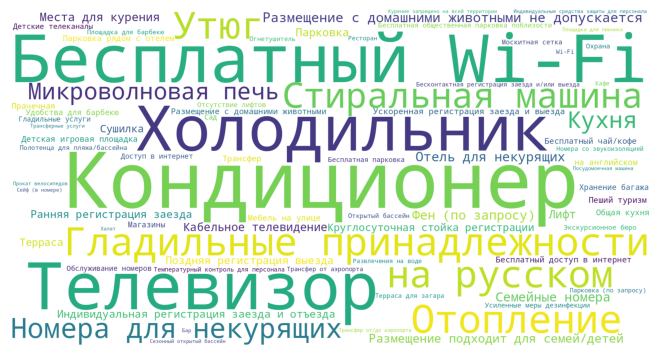

In [ ]:
text = ', '.join(i for i in df_wc_a)
t = np.array(text.replace("'", "").split(', '))
a, fr = np.unique(t, return_counts=True)
dict_fr = dict(zip(a, fr))
wordcloud = WordCloud(width = 1900, height = 1000, prefer_horizontal=1,
                background_color ='white',
                collocations=False,
                min_font_size = 15).generate_from_frequencies(dict_fr)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Таким образом, наиболее часто отмечаемыми дополнительными удобствами, являются наличие техники - то есть кондиционера, телевизора, холодильника, утюга и гладильных принадлежностей, а также бесплатный Wi-Fi

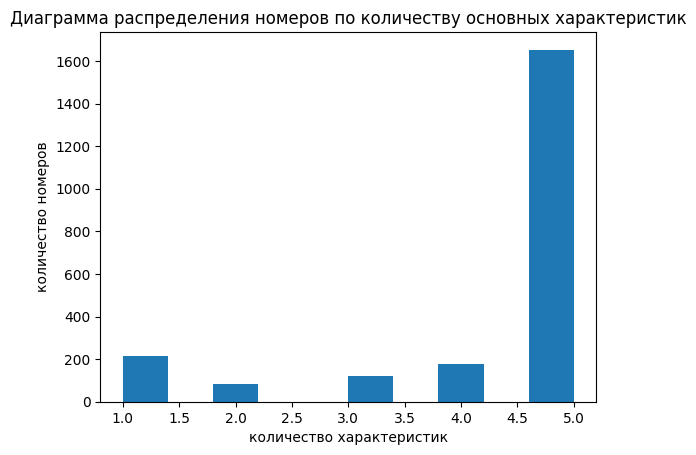

In [ ]:
plt.hist(df_w['perks_n'])
plt.title("Диаграмма распределения номеров по количеству основных характеристик")
plt.xlabel("количество характеристик")
plt.ylabel("количество номеров")
plt.show()

По данному графику видно, что подавляющее большинство отелей имеет 5 основных характеристик

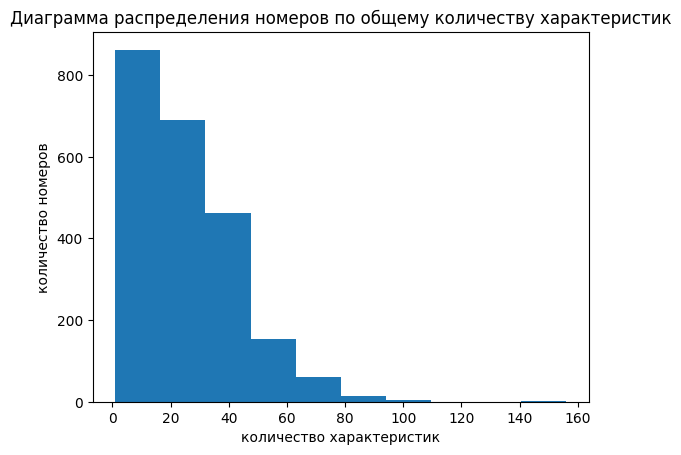

In [ ]:
plt.hist(df_w['amenities_n'])
plt.title("Диаграмма распределения номеров по общему количеству характеристик")
plt.xlabel("количество характеристик")
plt.ylabel("количество номеров")
plt.show()

Как мы видим, количество дополнительных характеристик может существенно отличаться от отеля к отелю - и хотя большинство из них попадает в промежуток от 0 до 20, существует также большое количество отелей с количеством характеристик от 20 до 60

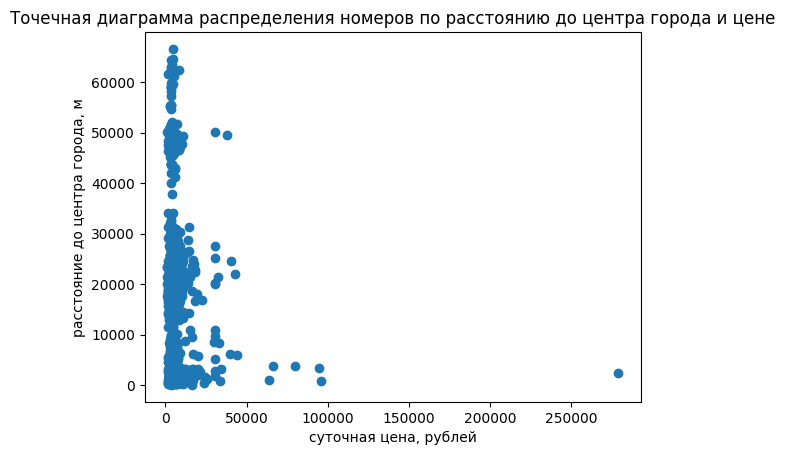

In [ ]:
plt.scatter(df_w['price'], df_w['dist_city'])
plt.title("Точечная диаграмма распределения номеров по расстоянию до центра города и цене")
plt.xlabel("суточная цена, рублей")
plt.ylabel("расстояние до центра города, м")
plt.show()

Как мы видим, цена номера не имеет сильной видимой зависимости от расстояния до центра города

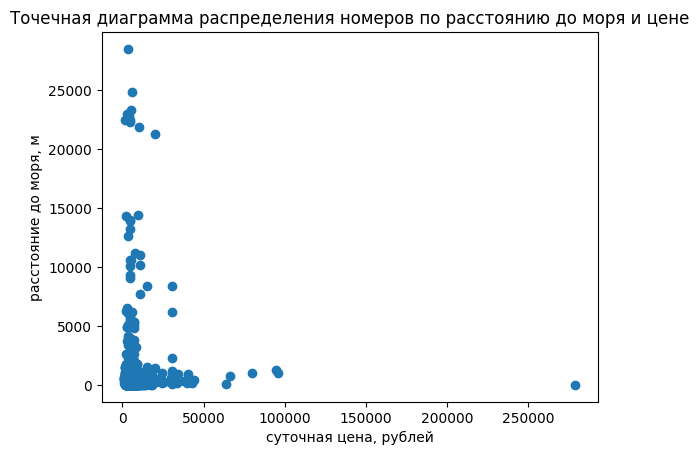

In [ ]:
plt.scatter(df_w['price'], df_w['dist_sea'])
plt.title("Точечная диаграмма распределения номеров по расстоянию до моря и цене")
plt.xlabel("суточная цена, рублей")
plt.ylabel("расстояние до моря, м")
plt.show()

Как мы видим, цена номера не имеет сильной видимой зависимости от расстояния до моря

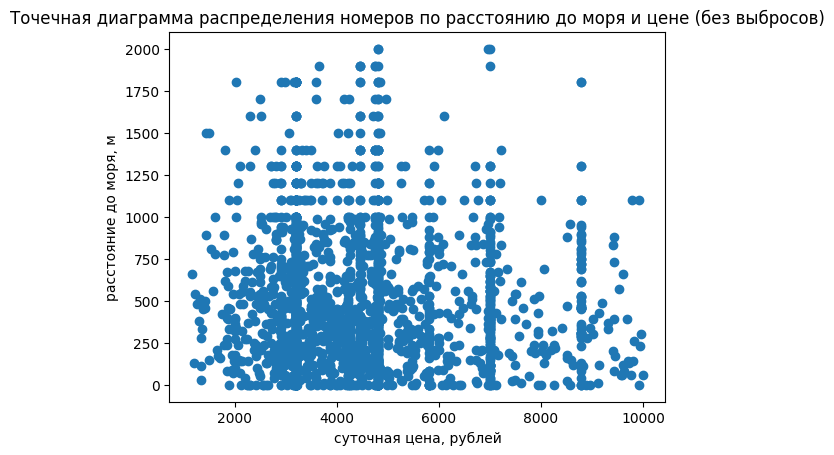

In [ ]:
#без выбросов
plt.scatter(df_w[(df_w['price'] <= 10000) & (df_w['dist_sea'] <= 2000)]['price'], df_w[(df_w['price'] <= 10000) & (df_w['dist_sea'] <= 2000)]['dist_sea'])
plt.title("Точечная диаграмма распределения номеров по расстоянию до моря и цене (без выбросов)")
plt.xlabel("суточная цена, рублей")
plt.ylabel("расстояние до моря, м")
plt.show()

Чтобы посмотреть на зависимость без учета выбросов, мы оставили только те наблюдения, в которых суточная цена номера входит в промежуток от 0 до 10000 рублей, а расстояния до моря до 2км, однако прямой линейной зависимости на данных все еще не очень наблюдается, что может свидетельствовать о том, что для данной выборке лучше использовать нелинейные модели

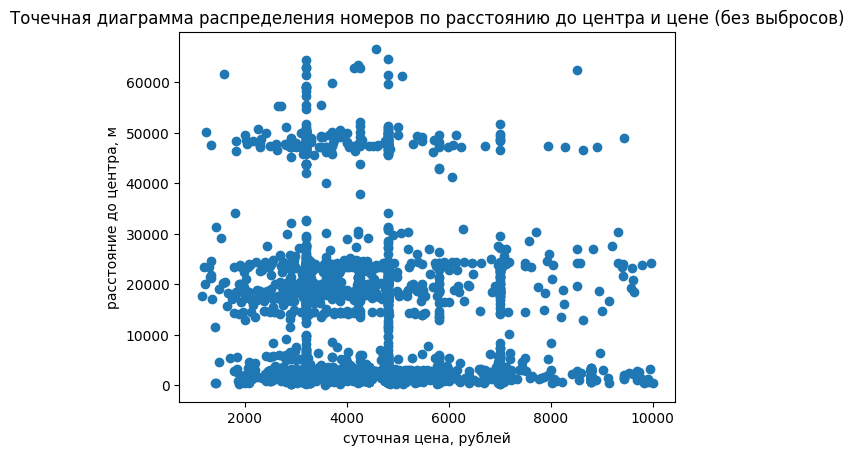

In [ ]:
#без выбросов
plt.scatter(df_w[df_w['price'] <= 10000]['price'], df_w[df_w['price'] <= 10000]['dist_city'])
plt.title("Точечная диаграмма распределения номеров по расстоянию до центра и цене (без выбросов)")
plt.xlabel("суточная цена, рублей")
plt.ylabel("расстояние до центра, м")
plt.show()

Мы убрали отели, суточная цена номера в которых превышает 10000 рублей и теперь на данных еще более явно видны три кластера в зависимости от расстояния до центра Сочи

In [ ]:
def significant(results, X):
    std_errors = list(results.bse)
    coefs = list(results.params)
    col_names = X.columns.tolist()
    n, k = X.shape
    t_crit = sts.t.ppf(q=0.975, df = n - k)
    signif = []
    for i in range(len(std_errors)-1):
        t_obs = coefs[i]/std_errors[i]
        pval = 2*min(sts.t.cdf(t_obs, 1772), 1-sts.t.cdf(t_obs, 1772))
        if abs(t_obs) > t_crit:
            signif.append(col_names[i])
    return signif

In [ ]:
def model_sign(results, X, y):
    n, k = X.shape
    y_pred = results.predict(X)
    r2 = r2_score(y, y_pred)
    f_obs = (r2 / (k-1)) / ((1 - r2) / (n - k))
    f_crit = f.ppf(0.95, k - 1, n - k)
    p_val = 2*min(f.cdf(f_obs, k - 1, n - k), 1 - f.cdf(f_obs, k - 1, n - k))
    return 'f_obs:', f_obs, 'f_crit:', f_crit, 'p_val:', p_val

In [ ]:
col_rename = {'Бар или ресторан': 'Restaurant_bin',
 'Бассейн': 'Pool_bin',
 'Бесплатный интернет': 'Internet_bin',
 'Джакузи': 'Jacuzzi_bin',
 'Для гостей с ограниченными возможностями': 'Disaibaled_bin',
 'Кондиционер': 'Conditioner_bin',
 'Конференц-зал': 'Conference_room_bin',
 'Кухня': 'Kitchen_bin',
 'Можно курить': 'Smoking_available_bin',
 'Парковка': 'Parking_bin',
 'Пляж рядом': 'Beach_nearby_bin',
 'Подходит для детей': 'Kids_bin',
 'Разрешено с домашними животными': 'Pets_bin',
 'Спа-услуги': 'SPA_bin',
 'Трансфер': 'Transfer_bin',
 'Фитнес': 'Fitness_bin'}

## Линейная модель

In [ ]:
X_1 = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/X_lin.csv').drop('Unnamed: 0', axis=1)
X_1 = sm.add_constant(X_1, prepend=False)
X_1.rename(columns = col_rename, inplace = True)
y_1 = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1)
mod_lin = sm.OLS(y_1, X_1)
res_lin = mod_lin.fit()

In [ ]:
print('Таблица 1')
print(res_lin.summary())

Таблица 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.48e-47
Time:                        19:18:18   Log-Likelihood:                -17862.
No. Observations:                1808   AIC:                         3.578e+04
Df Residuals:                    1778   BIC:                         3.595e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
dist_sea            

In [ ]:
significant(res_lin, X_1)

['dist_city',
 'stars',
 'feedb',
 'feedb_n',
 'perks_n',
 'amenities_n',
 'Restaurant_bin',
 'Internet_bin',
 'Kids_bin',
 'Pets_bin',
 'Fitness_bin']

Тест на значимость модели:

In [ ]:
model_sign(res_lin, X_1, y_1)

('f_obs:',
 11.283443960435893,
 'f_crit:',
 1.473898186864411,
 'p_val:',
 2.220446049250313e-16)

Вывод: уравнение модели значимо, так как F-наблюдаемое больше F-критического, значит, нулевая гипотеза отвергается и модель значима

Кроме того, p value стремится к нулю, то есть при любом разумном уровне значимости нулевая гипотеза отвергается и модель значима

## Полулогарифмическая модель

In [ ]:
X_3 = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/X_lin.csv').drop('Unnamed: 0', axis=1)
X_3 = sm.add_constant(X_3, prepend=False)
X_3.rename(columns = col_rename, inplace = True)
y_3 = np.log(pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1))
mod_hlog = sm.OLS(y_3, X_3)
res_hlog = mod_hlog.fit()

In [ ]:
print('Таблица 2')
print(res_hlog.summary())

Таблица 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     20.01
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.81e-88
Time:                        19:18:48   Log-Likelihood:                -1015.1
No. Observations:                1808   AIC:                             2090.
Df Residuals:                    1778   BIC:                             2255.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
dist_sea            

In [ ]:
X_3.shape

(1808, 30)

In [ ]:
significant(res_hlog, X_3)

['dist_city',
 'stars',
 'feedb',
 'feedb_n',
 'amenities_n',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'Fitness_bin',
 'tv_bin']

Тест на значимость модели в целом:

In [ ]:
model_sign(res_hlog, X_3, y_3)

('f_obs:',
 20.00720262359007,
 'f_crit:',
 1.473898186864411,
 'p_val:',
 2.220446049250313e-16)

Вывод: уравнение модели значимо, так как F-наблюдаемое больше F-критического, значит, нулевая гипотеза отвергается и модель значима

## Сравнение линейной и полулогарифмической моделей

Сделаем тест Бокса-Кокса с преобразованием Зарембки для сравнения линейной и полулогарифмической модели, для этого сначала посчитаем среднее геометрическое у, а потом посчитаем вспомогательные значения у, разделив зависимые переменные на их среднее геометрическое

In [ ]:
y_g = sts.gmean(pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1))
y_sup = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1)/y_g

После этого оценим вспомогательные модели, а потом будем проверять гипотезы, используя RSS, посчитанные для этих моделей

In [ ]:
X_c_5 = sm.add_constant(X_3, prepend=False)
mod5 = sm.OLS(y_sup, X_c_5)
res5 = mod5.fit()

X_c_6 = sm.add_constant(X_3, prepend=False)
y_sup_log = np.log(pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1))
mod6 = sm.OLS(y_sup_log, X_c_6)
res6 = mod6.fit()

Будем проверять гипотезы:

$H_0$: качество подгонки линейной и полулогарифмической моделей одинаковое

$H_1$: качество подгонки моделей разное, модель с меньшей RSS лучше

Для проверки гипотезы $H_0$ будем использовать тестовую статистику:

$\chi^2 = \frac{n}{2} * |ln(\frac{RSS_{lin}}{RSS_{log}})|$

In [ ]:
y_pred5 = res5.predict(X_c_5)
y_pred6 = res6.predict(X_c_6)
RSS5 = np.sum((y_sup - y_pred5)**2)
RSS6 = np.sum((y_sup_log - y_pred6)**2)

In [ ]:
chi = 1808/2 * np.log(RSS5/RSS6)

In [ ]:
crit_chi2 = sts.chi2.ppf(0.95, df=1)
crit_chi2

3.841458820694124

Поскольку полученное наблюдаемое значение статистики хи-квадрарт существенно превышает критическое значение (критическое значение статистики хи-квадрат с 1 степенью свободы на уровне значимости
0.05 равно 3.84), гипотеза H-0 отвергается и лучшей следует признать модель с меньшим RSS

In [ ]:
#RSS полулогарифмической модели
RSS4 = np.sum(res_hlog.resid ** 2)
RSS4

325.3699946073989

In [ ]:
#RSS линейной модели
RSS2 = np.sum(res_lin.resid ** 2)
RSS2

40371260726.0087

Таким образом, поскольку RSS полулогарифмической модели существенно лучше, чем линейной, качество подгонки полулогарифмической модели лучше, чем качество линейной модели

## Линейная модель в логарифмах

In [ ]:
y_log = np.log(pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1))
X_log = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/X_log.csv').drop('Unnamed: 0', axis=1)
X_log.rename(columns = col_rename, inplace = True)

In [ ]:
X_log = sm.add_constant(X_log, prepend=False)
model_log = sm.OLS(y_log, X_log)
results_log = model_log.fit()
print('Таблица 3')
print(results_log.summary())

Таблица 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     20.37
Date:                Fri, 10 May 2024   Prob (F-statistic):           3.97e-90
Time:                        19:19:32   Log-Likelihood:                -1011.0
No. Observations:                1808   AIC:                             2082.
Df Residuals:                    1778   BIC:                             2247.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars               

Значимые переменные:

In [ ]:
significant(results_log, X_log)

['stars',
 'feedb',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'Beach_nearby_bin',
 'Fitness_bin',
 'brekf_bin',
 'dist_city',
 'num_rooms',
 'amenities_n',
 'dist_sea']

Проверка значимости модели в целом

In [ ]:
model_sign(results_log, X_log, y_log)

('f_obs:',
 20.374137907734134,
 'f_crit:',
 1.473898186864411,
 'p_val:',
 2.220446049250313e-16)

Вывод: уравнение модели значимо, так как F-наблюдаемое больше F-критического, значит, нулевая гипотеза отвергается и модель значима

## Итог сравнения моделей:

$R^2_{adj} = 0.237$ для линейной модели в логарифмах, $R^2_{adj} = 0.234$ для полулогарифмической модели, то есть линейная модель в логарифмах несколько лучше



## Проверка на мультиколлинеарность

**С помощью коэффициентов корреляции**

Посчитаем коэффициенты корреляции для используемых переменных

In [ ]:
all_log = X_log.join(y_log)
corr = all_log.drop('const', axis=1).corr()
corr.style.background_gradient()

,stars,feedb,Restaurant_bin,Pool_bin,Internet_bin,Jacuzzi_bin,Disaibaled_bin,Conditioner_bin,Conference_room_bin,Kitchen_bin,Smoking_available_bin,Parking_bin,Beach_nearby_bin,Kids_bin,Pets_bin,SPA_bin,Transfer_bin,Fitness_bin,tv_bin,brekf_bin,fridge_bin,heat_bin,iron_bin,dist_city,num_rooms,perks_n,amenities_n,dist_sea,feedb_n,price
stars,1.000000,0.199020,0.200426,0.163808,0.082444,0.068557,0.187231,-0.200495,0.131045,-0.070282,-0.091422,0.098103,-0.270129,0.053619,0.091611,0.060350,0.096044,0.168641,0.101984,0.202420,0.008547,-0.004569,0.094754,-0.091197,0.412898,0.128022,0.216134,-0.077441,-0.066129,0.372275
feedb,0.199020,1.000000,0.140486,0.135705,0.316005,-0.049229,0.082037,-0.043278,0.026131,0.016023,-0.061957,0.110451,-0.264283,0.254501,0.068655,-0.030139,0.183150,0.078471,0.365190,0.158433,0.341630,0.228554,0.402958,-0.018249,0.368140,0.281973,0.391094,-0.067088,-0.133298,-0.020193
Restaurant_bin,0.200426,0.140486,1.000000,0.063318,0.104590,0.018075,0.060441,-0.196000,0.168557,-0.056827,-0.109657,0.044511,-0.279397,0.019961,-0.043810,0.090694,0.014139,0.028546,0.082991,0.157798,0.072446,0.058863,0.110108,-0.019131,0.197831,0.183340,0.187595,-0.083886,-0.046236,0.095232
Pool_bin,0.163808,0.135705,0.063318,1.000000,0.262741,0.006391,0.132731,-0.213496,0.009078,-0.133275,-0.127528,0.287589,-0.490103,0.316936,-0.000862,0.059966,0.231322,0.114700,0.290795,0.154286,0.216429,0.219060,0.278715,-0.002072,0.197831,0.368188,0.481811,-0.006980,-0.049217,0.178444
Internet_bin,0.082444,0.316005,0.104590,0.262741,1.000000,-0.168388,0.080851,0.055684,0.007646,-0.042721,-0.053372,0.379733,-0.313864,0.447129,0.065152,-0.049302,0.442147,0.093053,0.406820,0.143728,0.344950,0.428044,0.403994,-0.042514,0.145977,0.745085,0.719898,-0.016689,-0.038155,-0.006056
Jacuzzi_bin,0.068557,-0.049229,0.018075,0.006391,-0.168388,1.000000,-0.021627,-0.045218,-0.012684,-0.016737,-0.027797,-0.023135,0.056974,-0.097401,-0.027587,0.299171,-0.113647,-0.019520,-0.108968,-0.012558,-0.089899,-0.105281,-0.103258,0.045972,0.109162,0.002748,-0.082932,0.008011,-0.016415,0.013012
Disaibaled_bin,0.187231,0.082037,0.060441,0.132731,0.080851,-0.021627,1.000000,-0.113083,-0.030723,-0.040542,-0.057938,0.092837,-0.242528,0.136115,0.046618,-0.054580,0.050627,0.093912,0.111127,0.106658,0.031778,0.100964,0.137960,-0.030714,0.202830,0.101711,0.183586,-0.037035,-0.030688,0.209165
Conditioner_bin,-0.200495,-0.043278,-0.196000,-0.213496,0.055684,-0.045218,-0.113083,1.000000,-0.073614,0.228889,0.192631,-0.191701,0.378622,-0.165535,-0.015030,-0.113471,-0.192753,-0.121483,0.046472,-0.127963,0.072910,0.181319,0.036935,-0.067391,-0.218604,0.173350,0.023804,0.018148,0.014698,-0.092206
Conference_room_bin,0.131045,0.026131,0.168557,0.009078,0.007646,-0.012684,-0.030723,-0.073614,1.000000,-0.023776,-0.023994,-0.032864,-0.086149,-0.036617,-0.008003,0.059846,-0.007853,-0.006558,0.031649,0.065006,-0.001710,-0.003572,0.004919,-0.033280,0.076142,0.056149,0.056119,0.020422,-0.022094,0.074885
Kitchen_bin,-0.070282,0.016023,-0.056827,-0.133275,-0.042721,-0.016737,-0.040542,0.228889,-0.023776,1.000000,0.007369,-0.132468,0.116506,-0.113824,-0.027770,-0.055945,-0.147527,-0.036592,0.108050,-0.059982,0.057196,-0.009040,0.084493,-0.022067,-0.071741,0.037148,-0.017630,-0.005834,-0.002346,-0.024257


Индикатором наличия мультиколлинеарности является наличие коэффициентов корреляции близких к единице. В исследуемом наборе данных максимальным значением коэффициента корреляции является значение равное 0.74, и оно недостаточно велико для того, чтобы говорить о том, что в данных есть проблема мультиколлинеарности

**С помощью VIF**

Если $VIF > 10$, присутствует мультиколлинеарность.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_log.drop('const', axis=1).values, i) for i in range(X_log.drop('const', axis=1).shape[1])]
vif['variable'] = X_log.drop('const', axis=1).columns
vif

,VIF,variable
0,1.763123,stars
1,3.447863,feedb
2,2.205936,Restaurant_bin
3,3.673799,Pool_bin
4,15.809774,Internet_bin
5,1.252876,Jacuzzi_bin
6,1.228831,Disaibaled_bin
7,3.824569,Conditioner_bin
8,1.154099,Conference_room_bin
9,1.402558,Kitchen_bin


Отметим, что $VIF > 10$ для следующих признаков: Бесплатный интернет, dist_city, perks_n, amenities_n. Попробуем преобразовать признаки perks_n, amenities_n в одну переменную, чтобы избавиться от мультиколлинеарности. Для этого создадим новую переменную amen_only, в которой будут собраны только дополнительные услуги отеля (те, которых нет в общих услугах (perks), но есть в доп. услугах (amenities), так как perks может дублировать amenities).

Кроме того, создадим переменную sum_dist_w, которая представляет собой логарифм суммы расстояний. Чем выше этот показатель, тем дальше отель находится либо от моря, либо от центра, либо и того, и другого, поэтому мы предполагаем, что, так как увеличение обеих этих переменных отрицательно влияют на цену, цена будет выше при меньшей сумме расстояний.

Код создания переменных представлен во втором файле


In [ ]:
X_log_am_sum_dist = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/data_am')
X_log_am_sum_dist.rename(columns = col_rename, inplace = True)
X_log_am_sum_dist.head()

,stars,feedb,Restaurant_bin,Pool_bin,Internet_bin,Jacuzzi_bin,Disaibaled_bin,Conditioner_bin,Conference_room_bin,Kitchen_bin,...,Fitness_bin,tv_bin,brekf_bin,fridge_bin,heat_bin,iron_bin,num_rooms,feedb_n,amen_only,sum_dist_w
0,0,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.304065,1.945910,0,9.803667
1,0,8.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.079442,3.218876,22,9.777924
2,0,9.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,2.944439,3.610918,26,10.129028
3,0,7.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,3.583519,2.302585,32,9.841612
4,0,8.7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.484907,1.386294,32,9.938372


Проверим VIF для новых переменных:

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_log_am_sum_dist.values, i) for i in range(X_log_am_sum_dist.shape[1])]
vif['variable'] = X_log_am_sum_dist.columns
vif

,VIF,variable
0,1.761242,stars
1,3.436384,feedb
2,1.436871,Restaurant_bin
3,2.690226,Pool_bin
4,8.620539,Internet_bin
5,1.171551,Jacuzzi_bin
6,1.213366,Disaibaled_bin
7,2.085048,Conditioner_bin
8,1.078229,Conference_room_bin
9,1.169397,Kitchen_bin


Все значения оказались меньше 10, следовательно, проблема была решена и дальше можно работать с новыми данными

Проверим, улучшились ли результаты модели после изменения данных

In [ ]:
X_log_am_sum_dist_с = sm.add_constant(X_log_am_sum_dist, prepend=False)
model_sum = sm.OLS(y_log, X_log_am_sum_dist_с)
res_sum = model_sum.fit()
print(res_sum.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.21e-98
Time:                        19:45:17   Log-Likelihood:                -995.85
No. Observations:                1808   AIC:                             2046.
Df Residuals:                    1781   BIC:                             2194.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars                     0.12

In [ ]:
significant(res_sum, X_log_am_sum_dist_с)

['stars',
 'feedb',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'Fitness_bin',
 'tv_bin',
 'fridge_bin',
 'num_rooms',
 'amen_only',
 'sum_dist_w']

Можно заметить, что $R^2$ и $R^2_{adj}$ иувеличились - 0.262 и 0.251 против 0.249 и 0.237 соответственно

##Удаление выбросов

In [ ]:
X_log_am_sum_dist_с = sm.add_constant(X_log_am_sum_dist, prepend=False)

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
mod = sm.OLS(y_log, X_log_am_sum_dist_с).fit()
DFFITS, crit = OLSInfluence(mod).dffits
ej_ind = np.where(DFFITS > crit)[0]

print('Номера выбросов:', ej_ind, ', количество выбросов:', ej_ind.shape[0])

Номера выбросов: [  10   15   54   60   71   73   85  106  124  126  132  135  151  185
  195  198  201  216  310  318  333  429  526  543  656  665  695  697
  841 1006 1013 1016 1034 1067 1127 1159 1170 1185 1199 1208 1215 1218
 1273 1320 1334 1337 1363 1414 1498 1513 1525 1528 1542 1577 1674 1713
 1725 1746 1751 1764 1766 1768 1782 1802] , количество выбросов: 64


Удалим выбросы из данных:

In [ ]:
X_log_ej = X_log_am_sum_dist.drop(ej_ind)
y_log_ej = y_log.drop(ej_ind)

X_log_ej = X_log_ej.reset_index(drop=True)
y_log_ej = y_log_ej.reset_index(drop=True)

X_log_ej_c = sm.add_constant(X_log_ej, prepend=False)

res_log_am = sm.OLS(y_log_ej, X_log_ej_c).fit()

print('Таблица 4')
print(res_log_am.summary())

Таблица 4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     25.38
Date:                Fri, 10 May 2024   Prob (F-statistic):          4.37e-102
Time:                        19:24:56   Log-Likelihood:                -513.82
No. Observations:                1744   AIC:                             1082.
Df Residuals:                    1717   BIC:                             1229.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars               

In [ ]:
significant(res_log_am, X_log_ej_c)

['stars',
 'feedb',
 'Restaurant_bin',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'tv_bin',
 'brekf_bin',
 'num_rooms',
 'amen_only',
 'sum_dist_w']

##Проверка на гетероскедастичность



**Тест Уайта**

Проведем тест Уайта для проверки гипотезы о гетероскедастичности.

$H_0:$ в данных присутствует гомоскедастичность

$H_1:$ в данных присутствует гетероскедастичность (разброс остатков неравномерен)

Будем использовать встроенную в statsmodels.stats функцию het_white

In [ ]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(res_sum.resid, res_sum.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 440.0245987578912, 'Test Statistic p-value': 9.86496768506611e-05, 'F-Statistic': 1.4133888812980417, 'F-Test p-value': 1.3162146486750361e-05}


In [ ]:
print(f'{9.86496768506611e-05:.10f}')

0.0000986497


p-value тестовой статистики меньше 0.05, поэтому нулевая гипотеза отвергается - в данных присутствует гетероскедастичность

**Тест Бройша-Пагана**

$H_0:$ в данных присутствует гомоскедастичность

$H_1:$ в данных присутствует гетероскедастичность

In [ ]:
import statsmodels.stats.api as sms
bp_test = sms.het_breuschpagan(res_sum.resid, res_sum.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 68.57669313638031, 'p-value': 1.0666727220569707e-05, 'f-value': 2.700609714326636, 'f p-value': 8.303952775090394e-06}


In [ ]:
print(f'{1.0666727220569707e-05:.10f}')

0.0000106667


Поскольку для любого разумного уровня значимости p-value будет меньше выбранного уровня значимости, мы должны отвергнуть нулевую гипотезу об отсутствии гетероскедастичности

Оба теста подтвердили вывод о том, что данные гетероскедастичны


Для того, чтобы избавиться от гетероскедастичности, применим поправки Уайта (мы использовали поправку HC3, так как она дала лучшие резльтаты на модели)

In [ ]:
model_log2 = sm.OLS(y_log_ej,  X_log_ej_c)
results_log2 = model_log2.fit(cov_type='HC3')
par_log2 = results_log2.params

In [ ]:
#print(results_log2.summary())

In [ ]:
significant(results_log2, X_log_ej_c)

['stars',
 'feedb',
 'Restaurant_bin',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'tv_bin',
 'num_rooms',
 'amen_only',
 'sum_dist_w']

## Тест Рамсея для проверки спецификации модели

$𝐻_0$: спецификация модели является правильной

$𝐻_1$: спецификация модели является неправильной.

In [ ]:
X_ram = X_log_ej.copy()
y_pred_out = results_log2.predict(X_log_ej_c)
X_ram['pred_sq'] = y_pred_out**2
X_c_ram = sm.add_constant(X_ram, prepend=False)
mod_ram = sm.OLS(y_log_ej, X_c_ram)
res_ram = mod_ram.fit()

In [ ]:
print(res_ram.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     24.79
Date:                Fri, 10 May 2024   Prob (F-statistic):          7.60e-103
Time:                        19:25:27   Log-Likelihood:                -510.26
No. Observations:                1744   AIC:                             1077.
Df Residuals:                    1716   BIC:                             1230.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars                    -0.76

In [ ]:
RSS_final = np.sum(results_log2.resid ** 2)
RSS_ram = np.sum(res_ram.resid ** 2)
RSS_ram, RSS_final

(183.3168272486545, 184.06792804077233)

In [ ]:
X_log_ej_c.shape

(1744, 27)

Тестовая статистика для проверки гипотезы вычисляется по формуле:

$F_{obs} = \frac{(RSS_{r} - RSS_{ur})/(m-1)}{RSS_{ur}/(n-(k+m))}$, где $RSS_r$ - RSS для логарифмической модели, $RSS_{ur}$ - RSS для модели с вспомогательным регрессором, n=1744, k=27, m=2.

In [ ]:
F_obs_ram = ((RSS_final - RSS_ram)/1)/(RSS_ram/(1744-29))
F_obs_ram

7.026839149549617

In [ ]:
F_crit = sts.f.ppf(0.95, 1, 1744)
p_val = 2*min(sts.f.cdf(F_obs_ram, 1, 1777), 1 - sts.f.cdf(F_obs_ram, 1, 1744))
print('Критическое значение F-статистики равно ' + str(F_crit))
print('p-value равно ' + str(p_val))
if F_crit > F_obs_ram:
    print('Нет оснований для опровержения гипотезы H0 на уровне значимости 0.05')
else:
    print('Гипотеза H0 отвергается')

Критическое значение F-статистики равно 3.846796384316419
p-value равно 0.01620469576642236
Гипотеза H0 отвергается


Таким образом, мы должны отвергнуть нулевую гипотезу о том, что выбранная функциональная форма верна. Поэтому добавим квадраты переменных, которые не являются бинарными, а также перекрестные переменные

In [ ]:
X_log_new = X_log_ej.copy()
not_dummies = ['stars',	'feedb',	'num_rooms',	'amen_only',	'sum_dist_w',	'feedb_n']
for i in not_dummies:
    X_log_new[str(i) + '_^2'] = X_log_new[i]**2

In [ ]:
X_log_new.shape

(1744, 32)

In [ ]:
X_log_new_c = sm.add_constant(X_log_new, prepend=False)
mod_log_new = sm.OLS(y_log_ej, X_log_new_c)
res_log_new = mod_log_new.fit()

In [ ]:
print('Таблица 5')
print(res_log_new.summary())

Таблица 5
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     31.86
Date:                Fri, 10 May 2024   Prob (F-statistic):          7.00e-149
Time:                        19:25:49   Log-Likelihood:                -389.81
No. Observations:                1744   AIC:                             845.6
Df Residuals:                    1711   BIC:                             1026.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars               

In [ ]:
significant(res_log_new, X_log_new_c)

['stars',
 'feedb',
 'Restaurant_bin',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'brekf_bin',
 'num_rooms',
 'stars_^2',
 'feedb_^2',
 'num_rooms_^2']

Повторим тест Рамсея для проверки новой модели

In [ ]:
y_pred_log_new = res_log_new.predict(X_log_new_c)
RSS_log_new = np.sum((y_log['price'] - y_pred_log_new)**2)
RSS_log_new

504.41725098091945

In [ ]:
X_ram_2 = X_log_new.copy()
X_ram_2['pred_sq'] = y_pred_log_new**2
X_c_ram_2 = sm.add_constant(X_ram_2, prepend=False)
mod_ram_2 = sm.OLS(y_log_ej, X_c_ram_2)
res_ram_2 = mod_ram_2.fit()

In [ ]:
print('Таблица 6')
print(res_ram_2.summary())

Таблица 6
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     30.90
Date:                Fri, 10 May 2024   Prob (F-statistic):          3.33e-148
Time:                        19:26:10   Log-Likelihood:                -389.62
No. Observations:                1744   AIC:                             847.2
Df Residuals:                    1710   BIC:                             1033.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars               

In [ ]:
y_pred_ram_2 = res_ram_2.predict(X_c_ram_2)
RSS_ram_2 = np.sum((y_log['price'] - y_pred_ram_2)**2)
RSS_ram_2

504.331007258862

In [ ]:
F_obs_ram_2 = ((RSS_log_new - RSS_ram_2)/1)/(RSS_ram/(1808-39))
F_obs_ram_2

0.8322484444525682

In [ ]:
F_crit = sts.f.ppf(0.95, 1, 1769)
p_val = 2*min(sts.f.cdf(F_obs_ram_2, 1, 1769), 1 - sts.f.cdf(F_obs_ram_2, 1, 1769))
print('Критическое значение F-статистики равно ' + str(F_crit))
print('p-value равно ' + str(p_val))
if F_crit > F_obs_ram_2:
    print('Нет оснований для опровержения гипотезы H0 на уровне значимости 0.05')
else:
    print('Гипотеза H0 отвергается')

Критическое значение F-статистики равно 3.8467208757981037
p-value равно 0.7234949533470945
Нет оснований для опровержения гипотезы H0 на уровне значимости 0.05


Таким образом, поскольку у нас нет оснований для опровержения нулевой гипотезы, можно говорить о верной функциональной форме модели

Добавим третьи степени, чтобы посмотреть, не улучшится ли модель

In [ ]:
X_log_cubes = X_log_new.copy()
for i in not_dummies:
    X_log_cubes[str(i) + '_^3'] = X_log_new[i]**2

In [ ]:
X_log_cubes_c = sm.add_constant(X_log_cubes, prepend=False)
mod_log_cubes = sm.OLS(y_log_ej, X_log_cubes_c)
res_log_cubes = mod_log_cubes.fit()

In [ ]:
print('Таблица 7')
print(res_log_cubes.summary())

Таблица 7
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     31.86
Date:                Fri, 10 May 2024   Prob (F-statistic):          7.00e-149
Time:                        19:26:20   Log-Likelihood:                -389.81
No. Observations:                1744   AIC:                             845.6
Df Residuals:                    1711   BIC:                             1026.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
stars               

С добавлением кубов R^2 и R^2 adjusted не изменились, поэтому можно сделать вывод о том, что функциональная форма с квадратами переменных достаточно хорошо подходит

Посмотрим, какие переменные являются значимыми для данной модели:

In [ ]:
signif_log_new = significant(res_log_new, X_log_new_c)
signif_log_new

['stars',
 'feedb',
 'Restaurant_bin',
 'Pool_bin',
 'Internet_bin',
 'Disaibaled_bin',
 'brekf_bin',
 'num_rooms',
 'stars_^2',
 'feedb_^2',
 'num_rooms_^2']

In [ ]:
X_ram_sign = X_log_new[signif_log_new].copy()
X_ram_sign_c = sm.add_constant(X_ram_sign, prepend=False)
mod_ram_sign = sm.OLS(y_log_ej, X_ram_sign_c)
res_ram_sign = mod_ram_sign.fit()

In [ ]:
print('Таблица 8')
print(res_ram_sign.summary())

Таблица 8
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     85.17
Date:                Fri, 10 May 2024   Prob (F-statistic):          6.99e-154
Time:                        19:26:28   Log-Likelihood:                -420.39
No. Observations:                1744   AIC:                             864.8
Df Residuals:                    1732   BIC:                             930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
stars             -0.1120      0.0

Тогда, итоговая модель имеет вид:

$ln(price) = 8.5954 -0.1120 * stars -0.0336* feedb +0.0775*restaurant_{bin} + 0.0541*pool_{bin} - 0.0340*Internet_{bin} + 0.1497*disabled_{bin} + 0.0729*breakf_{bin} -0.2681*ln(num.rooms) + 0.0740*stars^2 + 0.0035*feedb^2 + 0.0413*ln(num.rooms)^2$

##Модель множественного выбора

Определим границы, по которым будем разделять категории.

In [ ]:
y = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/y_lin.csv').drop('Unnamed: 0', axis=1)['price']

print('Первая граница:', np.split(np.sort(np.unique(y)), 3)[0][-1])
print('Вторая граница:', np.split(np.sort(np.unique(y)), 3)[2][0])

Первая граница: 3362
Вторая граница: 5500


In [ ]:
y_multi = np.array([])
for i in range(y.shape[0]):
    if y.iloc[i] < 3362:
        y_multi = np.append(y_multi, 'Бюджетные')
    elif 3362 <= y.iloc[i] < 5500:
        y_multi = np.append(y_multi, 'Средние')
    elif 5500 <= y.iloc[i]:
        y_multi = np.append(y_multi, 'Дорогие')

Отметим, что мультиномиальная логит-модель очень чувствительна к большим наблюдениям (при использовании соответствующего пакета из `statsmodels` могут вылезти NaN и inf). Поэтому предварительно нормализуем признаки с помощью метода minmax.

In [ ]:
def norm_(df):
    for i in df.columns:
        df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())
    return(df)

In [ ]:
X_multi = pd.read_csv('https://raw.githubusercontent.com/pavleke/hotels/main/X_lin.csv').drop('Unnamed: 0', axis=1)
X_multi = norm_(X_multi)
X_multi.rename(columns = col_rename, inplace = True)
X_multi = sm.add_constant(X_multi)

In [ ]:
from statsmodels.discrete.discrete_model import MNLogit

m_multi = MNLogit(y_multi, X_multi).fit()
print('Таблица 9')
print(m_multi.summary())

Optimization terminated successfully.
         Current function value: 0.908617
         Iterations 8
Таблица 9
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1808
Model:                        MNLogit   Df Residuals:                     1748
Method:                           MLE   Df Model:                           58
Date:                Fri, 10 May 2024   Pseudo R-squ.:                  0.1526
Time:                        19:37:43   Log-Likelihood:                -1642.8
converged:                       True   LL-Null:                       -1938.6
Covariance Type:            nonrobust   LLR p-value:                 1.893e-89
            y=Дорогие       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6274      0.369     -1.702      0.089      -1.35

In [ ]:
sign_multi = ['const', 'dist_city', 'feedb', 'feedb_n', 'stars',
       'Restaurant_bin', 'Pool_bin',
       'Disaibaled_bin']

X_multi_sign = X_multi[sign_multi]

In [ ]:
m_multi_sign = MNLogit(y_multi, X_multi_sign).fit()
print('Таблица 10')
print(m_multi_sign.summary())

Optimization terminated successfully.
         Current function value: 0.929661
         Iterations 8
Таблица 10
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1808
Model:                        MNLogit   Df Residuals:                     1792
Method:                           MLE   Df Model:                           14
Date:                Fri, 10 May 2024   Pseudo R-squ.:                  0.1330
Time:                        19:38:29   Log-Likelihood:                -1680.8
converged:                       True   LL-Null:                       -1938.6
Covariance Type:            nonrobust   LLR p-value:                4.718e-101
     y=Дорогие       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6168      0.149     -4.132      0.000      -0.909      -0.324
dist_c

### LR-тест

$H_0:$ уравнение в целом незначимо (коэффициенты при переменных равны нулю).

$H_1:$ уравнение в целом значимо (коэффициенты при переменных не равны нулю).

$$ LR_{test} = -2 * (LL_R - LL_{UR}) $$

In [ ]:
LL = m_multi_sign.llf
LL_null = m_multi_sign.llnull
LR = -2 * (LL_null - LL)
chi_crit = sts.chi2.ppf(1 - 0.05, 16)
pv_multi = 1 - sts.chi2.cdf(LR, 16)

print('Значение тестовой LR-статистики:', LR)
print('Значение критической статистики хи-квадрат:', chi_crit)
if LR > chi_crit:
    print('Н_0 отвергается, ур-ние значимо на ур-не зна-ти 5%.')
else:
    print('Н_0 не отвергается, ур-ние не значимо на ур-не зна-ти 5%.')
print('P-value:', pv_multi)

Значение тестовой LR-статистики: 515.5322787162313
Значение критической статистики хи-квадрат: 26.29622760486423
Н_0 отвергается, ур-ние значимо на ур-не зна-ти 5%.
P-value: 0.0


$$ \hat P (y_i = Medium) = \frac{1}{1 + e^{-(-0.35 +3.16 \cdot stars + 0.65 \cdot bar/rest)}} $$

$$ \hat P (y_i = Exp) = \frac{1}{1 + e^{-(-0.62 -2.55 \cdot dist\_city -1.1 feedb + 41.4 \cdot feedb\_n + 4.75\cdot stars + 0.75 \cdot pool + 1.18 \cdot invalid  + 0.49 \cdot bar/rest)}} $$

## Примечания

**Коты**

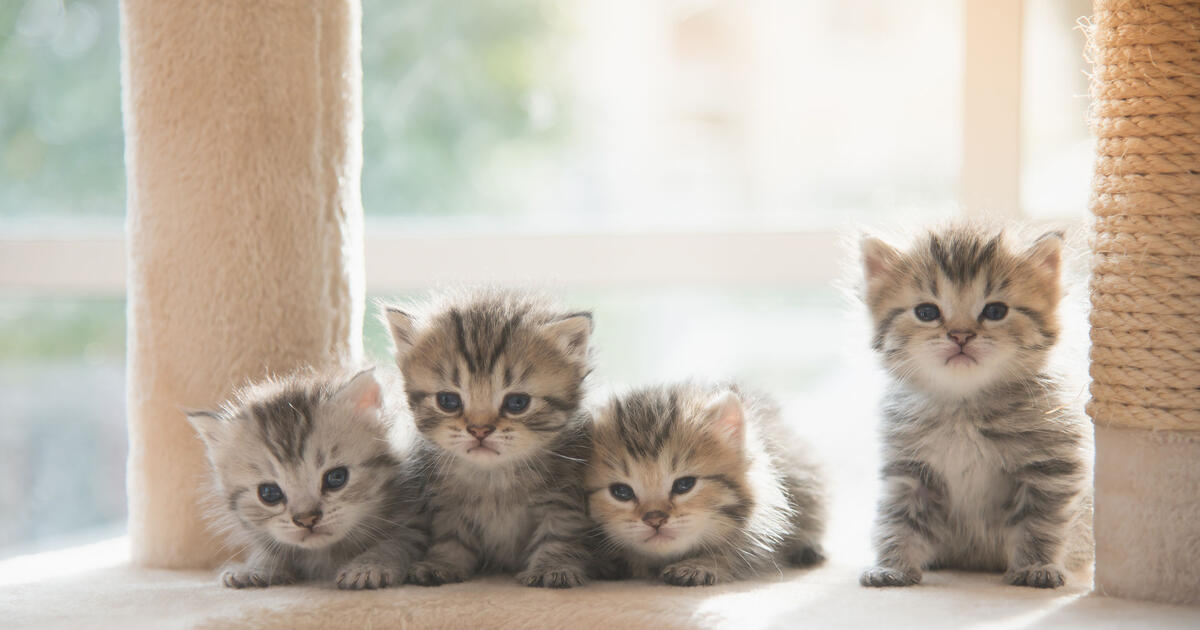